# An overview of gradient descent optimization algorithms(2017)
----

## Abstract
---
* Gradient Descent(경사하강법) 인기가 많지만, 장점과 단점에 대한 설명이 어렵다(블랙박스)
* 다양한 알고리즘의 비교를 통해서 독자가 잘 활용하는 것이 목적.
* 한줄 요약 그림
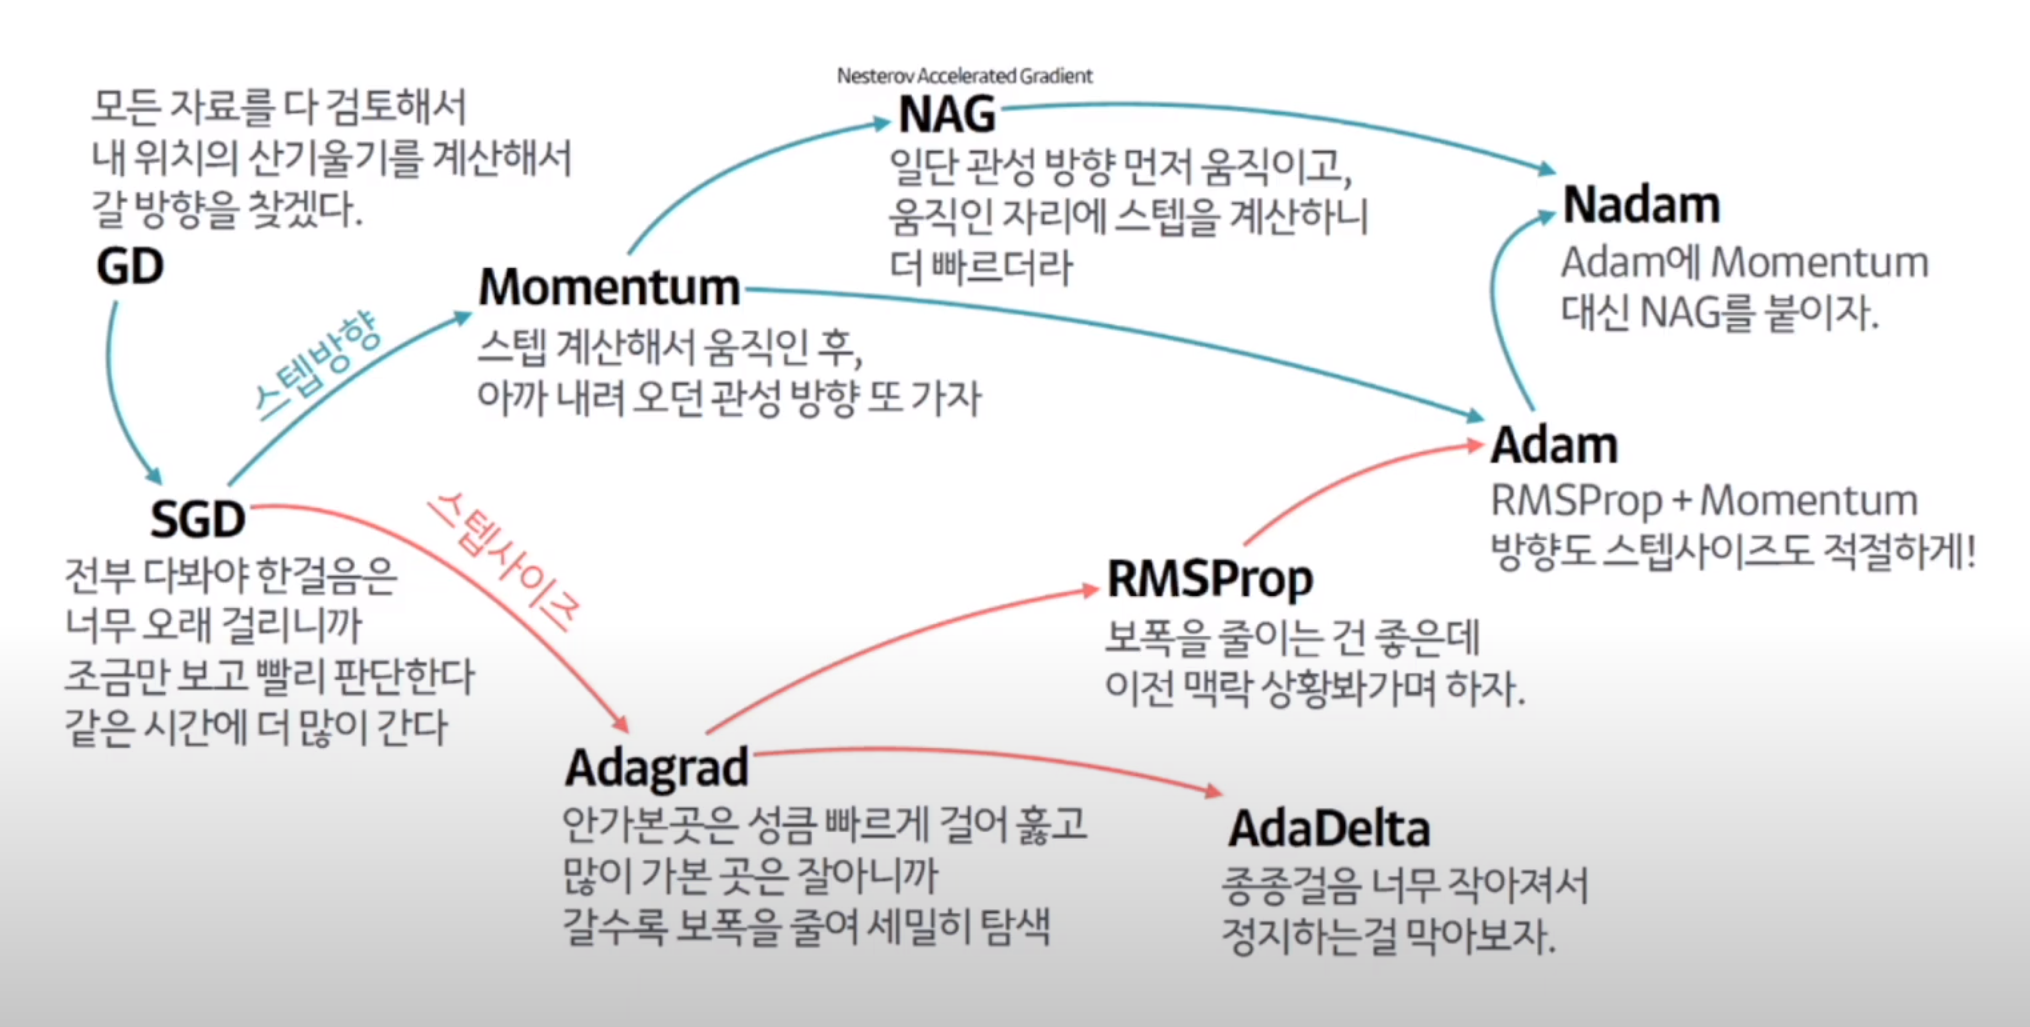

## Gradient Descent(경사 하강법)
---
![경사하강법](https://blog.kakaocdn.net/dn/CnzcB/btqW4iw28JL/uARxWkkE78nxbyAZlQs171/img.gif)

* 함수의 기울기(경사)를 구하고 경사의 반대 반향으로 계속 이동시켜 극값에 이를 때까지 반복시키는 방법.(위키백과)
* 목적 함수의 기울기와 반대로 반대 방향으로 Parameter θ를 업데이트하여 목적 함수를 최소화하는 방법.
* 총 Batch, Stochastic, Mini-batch 3가지가 있으며, 정확도랑 속도 측면에서 선택함.
* 학습률(Learning rate) : Parameter step의 크기
    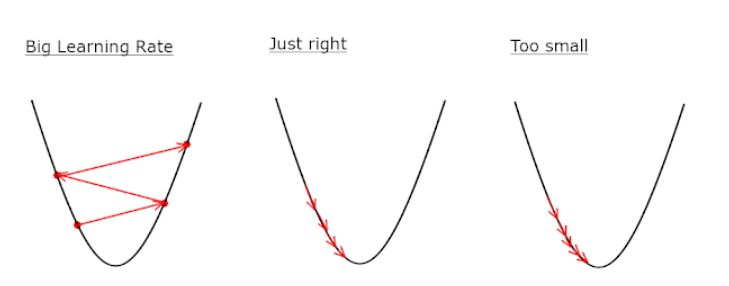
    * 학습률이 큰 경우: 최저점에 수렴하지 못함.
    * 학습률이 작은 경우: 학습시간에 매우 오래 거리며, 최저점 도달이 어려움.
    * 적절한 learning rate를 찾는 것이 중요!
    
### Batch Gradient Descent
---
* Vanilla Gradient Descent라고도 불림.
* 전체 학습 데이터 셋에 대해 cost를 구한 뒤 weight를 업데이트를 반복.
    * 데이터 셋에 데이터가 총 만개가 있다면, 만개에 대해 모두 계산.
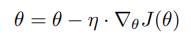
* Code
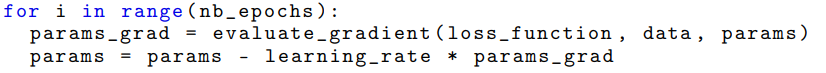
* 장점: 다른 GD방법에 비해 정확도가 높음.
* 단점: 
    * 데이터셋이 매우 큰 경우 다루기 어려움.
    * 학습이 매우 오래 걸림.

### Stochastic Gradient Descent
---
* 위의 BGD의 단점을 해결하기 위해서 나온 방법
* 데이터 한개에 대해 cost를 구해 weight를 업데이트하고 다시 랜덤으로 한개를 뽑아 cost를 구해 weight를 업데이트하는 반복.
    * 데이터 셋에 데이터가 총 만개가 있다면, 한개만 계산.
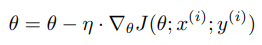
* code
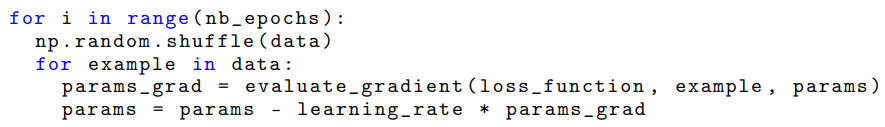
* 장점: 학습 속도가 빠름
* 단점: 
    * 학습이 잘 되지 않음.
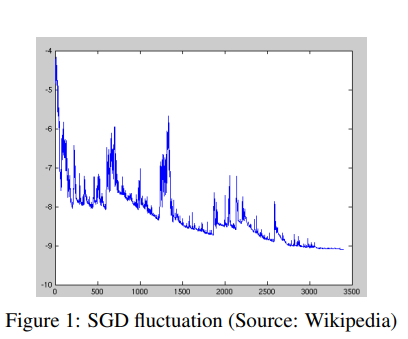

### Mini-batch gradient descent
---
* 위의 두가지 장점을 챙긴 방법.
* 랜덤으로 데이터 N개(보통50 ~ 256)에 대해 cost를 구해 weight를 업데이트를 반복.
    * 데이터 셋에 데이터가 총 만개이면, 10, 100, 20 등 일부 뭉텅이만 계산.
    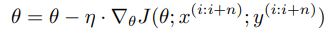
* code
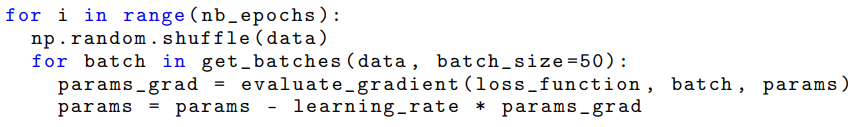

* 특징: 
    * 계산량이 작아 학습이 빠르게 이루어짐
    * 병렬 연산이 가능해짐.(최근 딥러닝 라이브러리에서 제공됨)
* 최근에 Mini-batch Gradient Descent가 굉장히 보편화되어 SGD를 Mini-batch Gradient Descent를 의미하는 경우가 많음.

## GD의 고려점.
---
* 적절한 학습률을 선택.
    * 처음에는 크게 학습되었다가 나중에는 줄어드는 방식.
    * 파라미터별로 다른 학습률 적용.(데이터 셋이 치우쳐 있는 경우)
* local minumum과 Saddle point(안장점) 탈출이 어려움
    * local minumum과 Saddle point는 gradient가 0에 가까움.
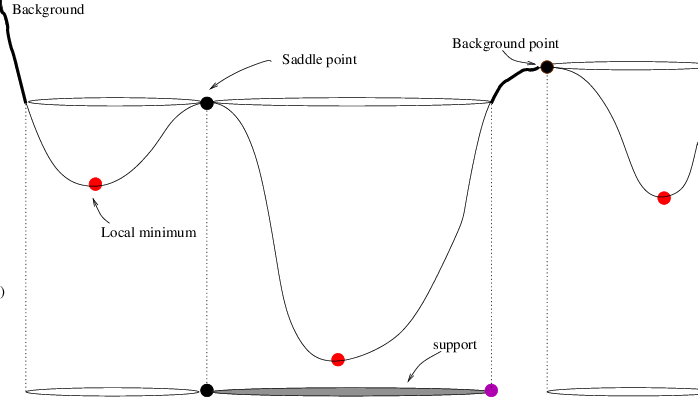

### Momentum
---
* SGD는 높은 평면에서 최적점으로 잘 찾아가질 못함.
    * 최적점 근처에서 학습이 잘안됨.  
* '관성'
    * 공을 위에서 아래서 떨어트리면, 운동E는 점차 높아짐.
    * weight를 업데이트 시 내리막길에서는 가속하고, 이전에 내려왔던 방향도 반영!
        * 달리는 자동차가 급 브레이크, 이동 방향으로 가속.
* 이를 통해 더 빠른 수렴(평탄한 지역을 탈출)과 진동이 줄어들게 된다. 
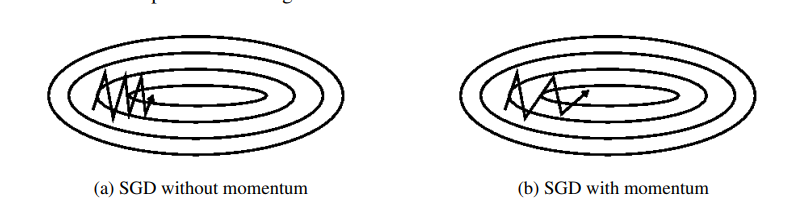

* 관련 식
    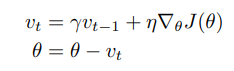
* 감마값은 0.9정도를 추천.


### Nesterov accelerated gradient(NAG)
---
* 하지만, 학습시 기울기가 항상 감소하지만은 않음. 기울기가 증가하는 방향으로 학습이 진행되기도함.
    * 따라서 위에서 momentum은 단순히 내려갈때 더 빠르게 내려가는 것.
* 보다 더 영리한 '공'이 필요함.
    * 현재의 파라미터와 과거의 파라미터를 이용해 미래의 파라미터를 대략적으로 예측할 수 있음.
* NAG는 잘못된 방향으로 갔을 대 gradient로 대처하는 방법.

* 관련식
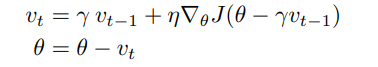
* 모멘텀이랑 비슷하게 감마값을 0.9로 설정.
* NAG를 통해서 RNN의 성능을 향상시킴.

---
* 모멘텀의 동작
    * 1. 현재 위치에서 gradient를 구함
    * 2. 이전 velocity를 가져옴.
    * 3. 이 두가지 방향을 더한 방향으로 진행.

* Nesterov 
    * 1. 이전 velocity를 가져옴.
    * 2. 이전 velocity의 방향대로 갓을 때 지점의 gradient를 구함
    * 3. 이 두가지를 더한 방향으로 진행.

* 차이 확인 
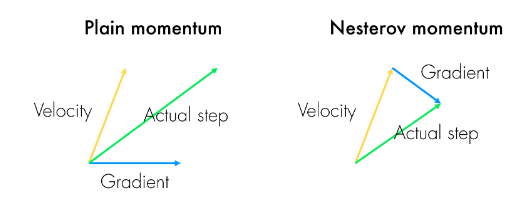

### Adagrad
---
* 위의 Nesterov와 Momentum 둘다 Learning rate에 대해서 따로 건들지 않음.
* 하지만, learning rate를 일괄적으로 적용하는 건 비효율적이기 때문에 이를 가변적으로 적용하는 아이디어에서 나옴.
* 희소한 데이터를 처리하는 적합.
    * 등장 당시에는 구글에서 대규모 신경망 학습시 사용, Youtube 알고리즘으로도 사용.
* 장점:
    * Feature마다 다른 learning rate 작동
    * 자동으로 learning rate 조절.
    * 많이 학습된건 자동으로 learning rate가 낮아짐.
* 단점:
    * 하지만, non-convex한 경우 saddle point에 갇힐 수 있다.

* Adagrad 사용 시 learning-rate를 다른 알고리즘에 비해 더 크게 줘야 진행이 느려지지 않음.
* 관련식
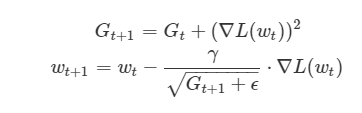

### Adadelta
---
* Adagrad의 단점인 감소하는 학습률을 줄이기 위한 추가된 방법.
    * 과거의 모든 기울기의 제곱을 분모에 누적시키는 것이 아니라 특정한 구간의 기울기만 이용.
* 가중 평균를 사용.
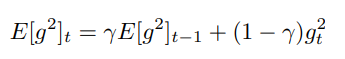
* 감마는 0.9정도로 이전 시점까지의 평균값을 0.9, 현재의 기울기를 0.1로 더해서 계산. 

* 필요없는 leraning rate  
식1. 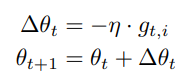
식2. 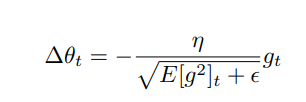
식3. 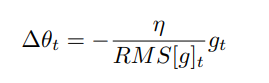
식4. 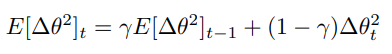
식5. 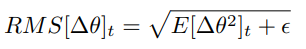
식6. 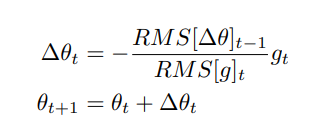

### RMSProp(Root Mean Squared Prop)
---
* RMSprop도 Adagrad의 단점을 계선하기 위해 나온 방법
* 논문이 없음.
* 관련식(감마가 0.9, learning_rate =0.001)
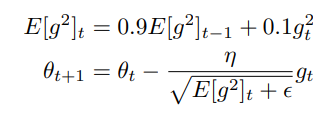

### Adam(Adaptive Moment Estimation)
* 각 매개변수에 대한 가변 학습률을 적용함.
* RMSprop + Momentum

* 관련식 
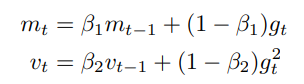
*  Adadelta와 RMSprop 비슷하게 가중평균을 사용.
* m은 기울기의 1차 moment(평균)의 추정량, v는 기울기의 2차 모멘트(분산)의 추정량.
* 하지만, m, v는 0으로 초기ㅇ화 되어 있어 학습 초기와, decay_rate가 0에 가까울때 0으로 편향되어 있어 이를 반영해 아래와 같이 수정한다
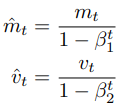
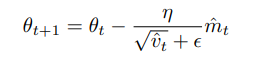
* beta1 =0.9, beta2 =0.999, learning_rate = 1e-3 or 5e-4

### AdaMax
---
* Adam에서 확장된 느낌.
* Adam의 v 계산시 이전항과 현재의 기울기를 이용할 때 L2 norm 되심 LP norm으로 확장시킨 알고리즘.
* 관련 식
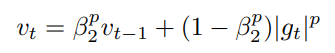
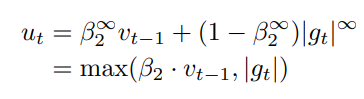
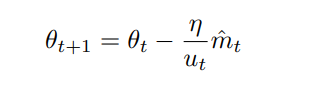
* 이를 통해서 경사도에 noise나 변동이 있을 경우에 이러한 불안정한 경사도에 보다 더 강점을 보이게 된다.

### Nadam(Nesterov-accelerated Adaptive Moment Estimation)
---
* Adam의 발전 버전.
* RMSProp + NAG(Nesterov accelerated gradient)
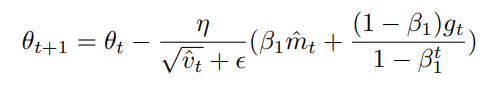

* 이를 통해서 Local Optima에 빠지는 것을 방지.
* 하지만, 기본적으로 하나의 파라미터가 늘어나게 됨(계산량증가).

### AdamW
---
* Adam + Weight decay
* Weight decay는 모델 파라미터의 크기를 제한하여, 오버피팅을 방지하는 기술.
* 다음 리뷰 논문.

## 알고리즘의 시각화(Visualization of algorithms)
---
* 얼마나 잘 찾아가는지
![이미지](https://media.giphy.com/media/KXFOUfGczmL7MXkjIi/giphy.gif)
![이미지](https://cs231n.github.io/assets/nn3/opt2.gif)

* 빠져 나오기


![이미지](https://media.giphy.com/media/dqHC8AIezoFKXnb56Z/giphy.gif)
![이미지](https://media.giphy.com/media/cSRNLluRz69B93Zf5X/giphy.gif)

## 번외편 1. 병렬 연산을 위한 SGD
---
* 최근에는 대규모의 데이터 세을 사용하기 때문에 하나의 컴퓨터에서도 SGD를 병렬화하여 진행한다.

* 제안된 알고리즘 및 아키텍쳐
    * Hogwild!
    * Downpower SGD
    * Delay-tolerant Algorithms for SGD
    * TensorFlow
    * Elastic Averaging SGD

## 변외편 2. SGD 성능 향상시키기 위한 다양한 전략
---

###  Shuffling and Curriculum Learning
---
* Shuffling Learning : 편향을 일으킬 수 있는 특정한 순서로 학습을 진행하는 것을 방지하기 위해 각 epoch 이후에 학습 데이터를 섞는 방법.
* Curriculum Learning: 인간이 학습하는 프로세스를 모방하여 쉬운 난이도의 데이터를 먼저 학습하고, 점차 어려운 데이터를 학습하는 전략.
    * 모델의 학습 수렴 속도와 성능에서 성과를 보이는 연구 분야.
    * 난이도에 다라 정렬하는 간단한 방법보다 병합 또는 혼합 전략이 더 효과적!!

###  Batch normalization
---
* standard normalization : 학습의 편리성을 위한 파라미터의 초기값을 평균이 0이고 분산이 1(정규분포)로 초기화하여 표준화를 진행.
* 하지만, 학습을 진행하다 보면, 서로 다르게 업데이트되면서 표준화가 깨지게 되어 훈련이 느려지고 이는 Deep할수록 더 느려진다.
* Batch normalizaion : 각 미니 배치에 대해 표준화를 되찾고 변화도가 backpropagatoin으로 연산되게 하여 높은 학습률로 학습되게 한다.
    * 이러한 작업으로 Dropout의 필요성도 낮출 수 있음.

### Early stopping
---
* Early Stopping : 학습 중에 Validation의 loss를 모니터링하여 Validation의 오류가 충분히 개선되지 않으면 중지.
* 예시 사진
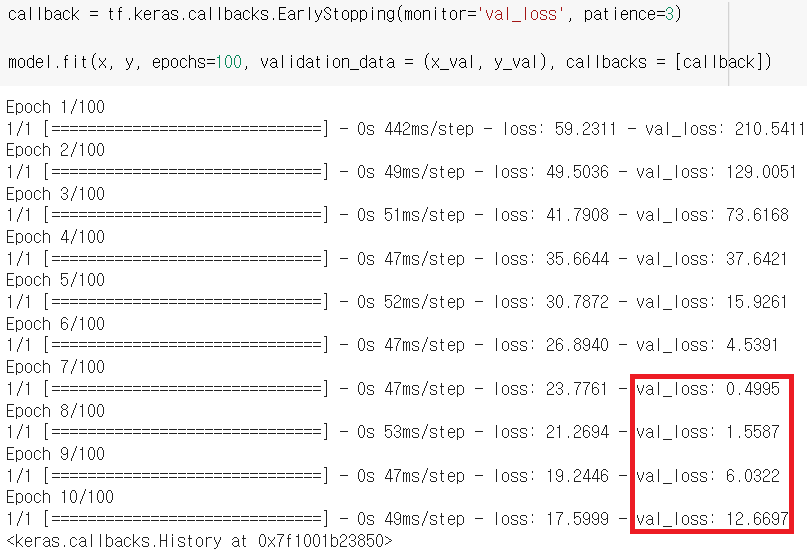

### 6.4 Gradient noise
---
* Gradient noise : Gradient 업데이트의 과정에 가우시안 분포를 자진 noise를 추가하는 것.
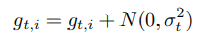
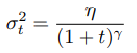
* 노이즈를 추가해 더 깊고 복잡한 Neural Network을 잘 훈련한다.

## Summary
---
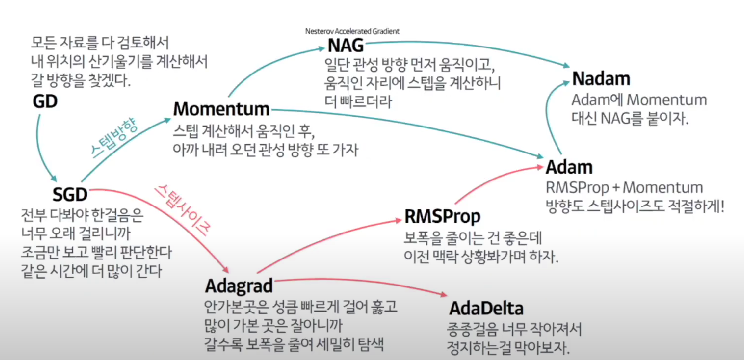